In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [71]:
# Cargar los datos desde un archivo Excel
file_path = 'Datos_Entrada_TecServices.xlsx'  # Reemplaza con la ruta a tu archivo
df = pd.read_excel(file_path)

In [72]:
# Mostrar las primeras filas del dataframe
print("Primeras filas del conjunto de datos:")
print(df.head())

Primeras filas del conjunto de datos:
   idQuestion        Question  idAnswer  \
0         NaN     Otros Temas      5000   
1         NaN         Gympass     90150   
2         NaN  Ciberseguridad      5100   
3         NaN         Compras      5300   
4         NaN         Eventos      5600   

                                       Answer                  Tema  \
0        Algunas de las preguntas frecuentes:  Preguntas frecuentes   
1         Preguntas frecuentes de **Gympass**  Preguntas frecuentes   
2  Preguntas frecuentes de **Ciberseguridad**  Preguntas frecuentes   
3     Preguntas frecuentes de **mis Compras**  Preguntas frecuentes   
4         Preguntas frecuentes de **Eventos**  Preguntas frecuentes   

          Subtema Audiencia  Responsable   QnaId1  \
0     Otros temas  pregfreq          NaN  90150.0   
1         Gympass  pregfreq          NaN  90151.0   
2  Ciberseguridad  pregfreq          NaN   5101.0   
3     mis Compras  pregfreq          NaN   5301.0   
4         E

In [73]:
# 1. Analizar valores faltantes
print("\nValores faltantes por columna:")
missing_values = df.isnull().sum()
print(missing_values)


Valores faltantes por columna:
idQuestion       47
Question          0
idAnswer          0
Answer            0
Tema              0
Subtema           0
Audiencia         0
Responsable      47
QnaId1           39
DisplayText1     39
QnaId2           39
DisplayText2     39
QnaId3           39
DisplayText3     39
QnaId4           39
DisplayText4     39
QnaId5           39
DisplayText5     39
QnaId6           39
DisplayText6     39
QnaId7           44
DisplayText7     44
QnaId8           46
DisplayText8     46
QnaId9           47
DisplayText9     47
QnaId10          47
DisplayText10    47
QnaId11          47
DisplayText11    47
QnaId12          47
DisplayText12    47
QnaId13          47
DisplayText13    47
QnaId14          47
DisplayText14    47
QnaId15          47
DisplayText15    47
QnaId16          47
DisplayText16    47
QnaId17          47
DisplayText17    47
QnaId18          47
DisplayText18    47
dtype: int64


In [74]:
# Eliminar columnas que están completamente vacías o contienen solo cadenas vacías
df = df.dropna(axis=1, how='all')  # Primero, eliminar columnas completamente vacías (NaN)
df = df[[col for col in df.columns if df[col].astype(bool).sum() > 0]]  # Luego, eliminar columnas que solo contienen cadenas vacías


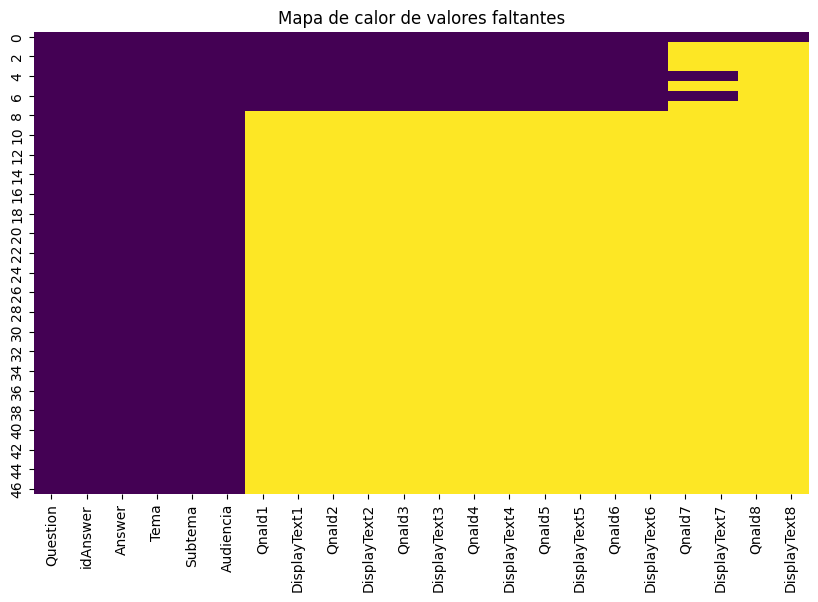

In [75]:
# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()

In [76]:
# 2. Estadísticas resumidas
print("\nEstadísticas resumidas del conjunto de datos:")
print(df.describe(include='all'))


Estadísticas resumidas del conjunto de datos:
           Question      idAnswer                                Answer  \
count            47     47.000000                                    47   
unique           47           NaN                                    47   
top     Otros Temas           NaN  Algunas de las preguntas frecuentes:   
freq              1           NaN                                     1   
mean            NaN  21040.936170                                   NaN   
std             NaN  29156.765073                                   NaN   
min             NaN   5000.000000                                   NaN   
25%             NaN   5303.500000                                   NaN   
50%             NaN   6002.000000                                   NaN   
75%             NaN  25342.000000                                   NaN   
max             NaN  90155.000000                                   NaN   

                        Tema  Subtema Audiencia     

In [77]:
df

,Question,idAnswer,Answer,Tema,Subtema,Audiencia,QnaId1,DisplayText1,QnaId2,DisplayText2,...,QnaId4,DisplayText4,QnaId5,DisplayText5,QnaId6,DisplayText6,QnaId7,DisplayText7,QnaId8,DisplayText8
0,Otros Temas,5000,Algunas de las preguntas frecuentes:,Preguntas frecuentes,Otros temas,pregfreq,90150.0,Gympass,5100.0,Ciberseguridad,...,5600.0,Eventos,6000.0,mis Constancias,6600.0,mis Viajes,40684.0,Bienestar y Flexibilidad,5000.0,Regresar
1,Gympass,90150,Preguntas frecuentes de **Gympass**,Preguntas frecuentes,Gympass,pregfreq,90151.0,¿Cómo puedo registrarme en Gympass?,90152.0,¿Cuáles son los costos y membresías de Gympass?,...,90154.0,¿Cómo actualizar tu plan de Gympass a uno de m...,90155.0,¿Puedo pausar o cancelar mi plan de Gympass?,5000.0,Regresar,NaN,NaN,NaN,NaN
2,Ciberseguridad,5100,Preguntas frecuentes de **Ciberseguridad**,Preguntas frecuentes,Ciberseguridad,pregfreq,5101.0,¿Cómo instalo el antivirus en mi computadora?,5102.0,¿Mi celular usa antivirus?,...,5104.0,¿Cómo debo de activar la llave Digital?,5105.0,¿Cómo hago para que mi contraseña sea segura?,5000.0,Regresar,NaN,NaN,NaN,NaN
3,Compras,5300,Preguntas frecuentes de **mis Compras**,Preguntas frecuentes,mis Compras,pregfreq,5301.0,Ayuda con una cotización,5302.0,¿En qué casos aplica colocar el folio de refle...,...,5304.0,¿Cómo puedo hacer una compra con pcard?,5305.0,¿Dónde reporto que no me aparece mi orden de c...,5000.0,Regresar,NaN,NaN,NaN,NaN
4,Eventos,5600,Preguntas frecuentes de **Eventos**,Preguntas frecuentes,Eventos,pregfreq,5601.0,¿Cómo solicitar alimentos y bebidas para mi ev...,5602.0,¿Cómo obtener un espacio para evento en campus?,...,5604.0,¿Cuáles son los requisitos para que mi evento ...,5605.0,¿Qué guía me ayudará a implementar acciones so...,5607.0,¿Cómo puedo pedir una sala de conferencias?,5000.0,Regresar,NaN,NaN
5,Mis Constancias,6000,Preguntas frecuentes de **mis Constancias**,Preguntas frecuentes,mis Constancias,pregfreq,6001.0,¿Qué constancias puedo descargar?,6002.0,¿Cómo obtengo una constancia en inglés?,...,6004.0,¿Dónde descargo mi constancia de registro en e...,6005.0,¿Cómo consigo una constancia para trámtiar VISA?,5000.0,Regresar,NaN,NaN,NaN,NaN
6,Viajes,6600,Preguntas frecuentes de **mis Viajes**,Preguntas frecuentes,mis Viajes,pregfreq,6601.0,¿Cómo puedo consultar los hoteles en convenio?,6602.0,¿Cuál es la guía de devolución de sobrantes de...,...,6604.0,¿Cómo puedo obtener una Tarjeta Corporativa?,6605.0,¿Dónde puedo solicitar un Anticipo de viajes?,6607.0,¿Cómo pido mi reembolso de gastos de viaje?,5000.0,Regresar,NaN,NaN
7,Bienestar y Flexibilidad,40684,Preguntas frecuentes de **Bienestar y Flexibil...,Preguntas frecuentes,Bienestar,pregfreq,40685.0,¿Qué actividades deportivas puedo tomar en el ...,40686.0,¿Quiénes pueden acceder a las actividades físi...,...,40688.0,¿Cómo puedo solicitar ayuda a través de la lín...,40689.0,¿Hay algún espacio para meditar en mi campus?,5000.0,Regresar,NaN,NaN,NaN,NaN
8,Ninguna de las anteriores,10000,Siento mucho que por el momento no tengo la in...,Preguntas frecuentes,Ninguna,pregfreq,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,¿Cómo puedo registrarme en Gympass?,90151,Tienes dos opciones para **registrarte en Gymp...,Preguntas frecuentes,Gympass,pregfreq,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# 3. Análisis de valores atípicos para columnas de tipo string (preguntas y respuestas)
from collections import Counter

# Seleccionar columnas de tipo string
string_columns = df.select_dtypes(include=['object']).columns

for col in string_columns:
    # Contar la frecuencia de las palabras en la columna
    all_words = ' '.join(df[col].dropna()).split()
    word_counts = Counter(all_words)

    # Mostrar las palabras más comunes y menos comunes
    print(f"\nFrecuencia de palabras en la columna: '{col}'")
    print("Palabras más comunes:", word_counts.most_common(10))
    print("Palabras menos comunes:", word_counts.most_common()[:-11:-1])

    # Detección de valores atípicos: filas con palabras muy poco comunes
    df[f'{col}_unusual'] = df[col].apply(lambda x: any(word in word_counts and word_counts[word] == 1 for word in str(x).split()) if pd.notnull(x) else False)

    # Mostrar las filas que contienen palabras poco comunes
    outliers = df[df[f'{col}_unusual']]
    print(f"\nValores atípicos detectados en la columna '{col}':")
    print(outliers[[col]].head())



Frecuencia de palabras en la columna: 'Question'
Palabras más comunes: [('de', 21), ('¿Cómo', 20), ('puedo', 9), ('mi', 9), ('para', 9), ('en', 8), ('el', 7), ('una', 7), ('¿Qué', 5), ('la', 5)]
Palabras menos comunes: [('Regresar', 1), ('meditar', 1), ('algún', 1), ('¿Hay', 1), ('través', 1), ('ayuda', 1), ('Tec?', 1), ('ofrece', 1), ('físicas', 1), ('acceder', 1)]

Valores atípicos detectados en la columna 'Question':
          Question
0      Otros Temas
2   Ciberseguridad
3          Compras
4          Eventos
5  Mis Constancias

Frecuencia de palabras en la columna: 'Answer'
Palabras más comunes: [('de', 148), ('a', 71), ('en', 66), ('tu', 54), ('la', 53), ('\\n\\n', 51), ('y', 50), ('el', 42), ('que', 40), ('para', 30)]
Palabras menos comunes: [('principal', 1), ('menú', 1), ('Regresar', 1), ('[**enlace**](https://mitec.itesm.mx/sites/talentoycultura/Regreso_flexible/regreso_flexible/Espacios_de_bienestar.html).', 1), ('disponibilidad,', 1), ('así', 1), ('físico,', 1), ('promover

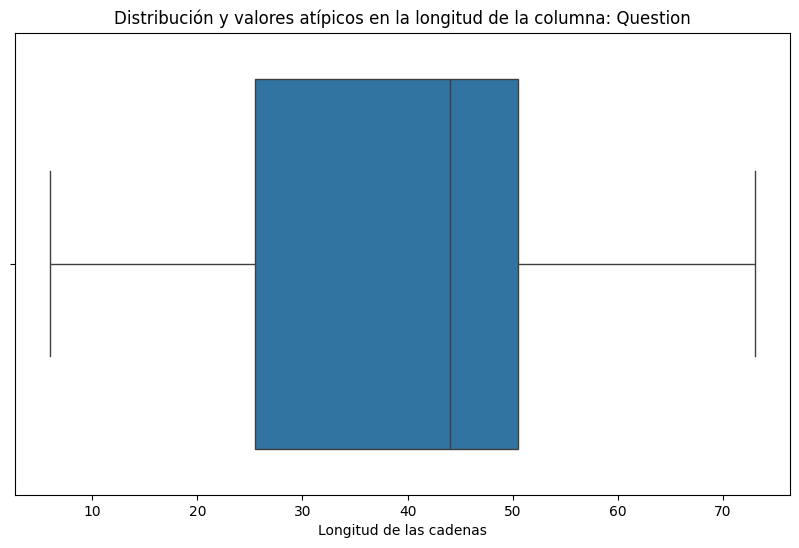


Valores atípicos detectados en la longitud de la columna 'Question':
                                             Question
23  ¿Dónde reporto que no me aparece mi orden de c...
28  ¿Qué guía me ayudará a implementar acciones so...
42  ¿Quiénes pueden acceder a las actividades físi...


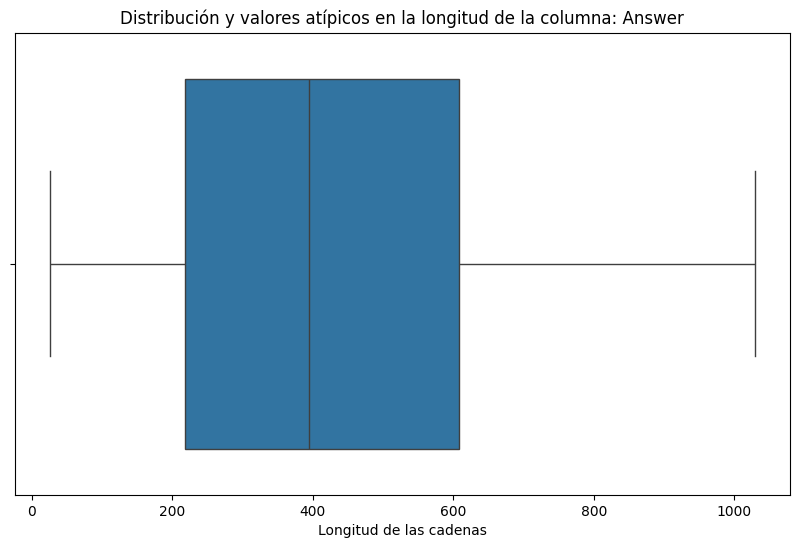


Valores atípicos detectados en la longitud de la columna 'Answer':
                                               Answer
14  Se puede instalar Crowdstrike a dispositivos a...
38  Puedes solicitar tu Tarjeta Corporativa Amex G...
39  Puedes **solicitar tu anticipo de viaje** en *...


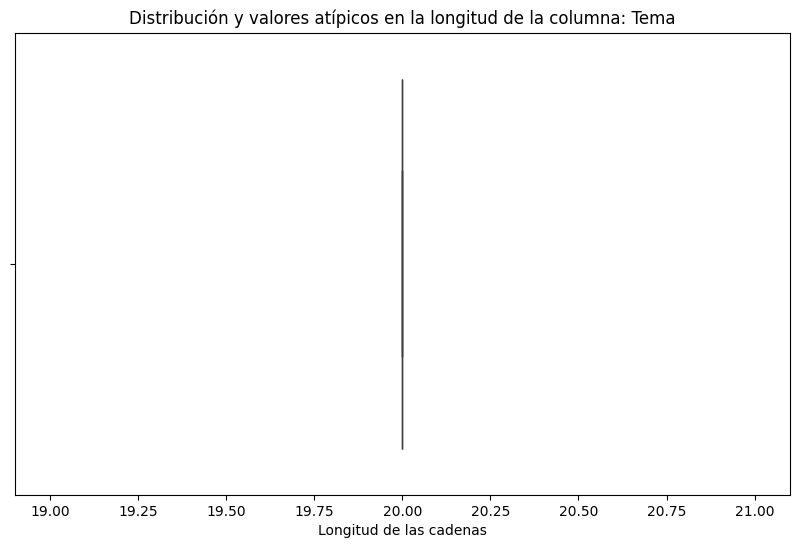


Valores atípicos detectados en la longitud de la columna 'Tema':
Empty DataFrame
Columns: [Tema]
Index: []


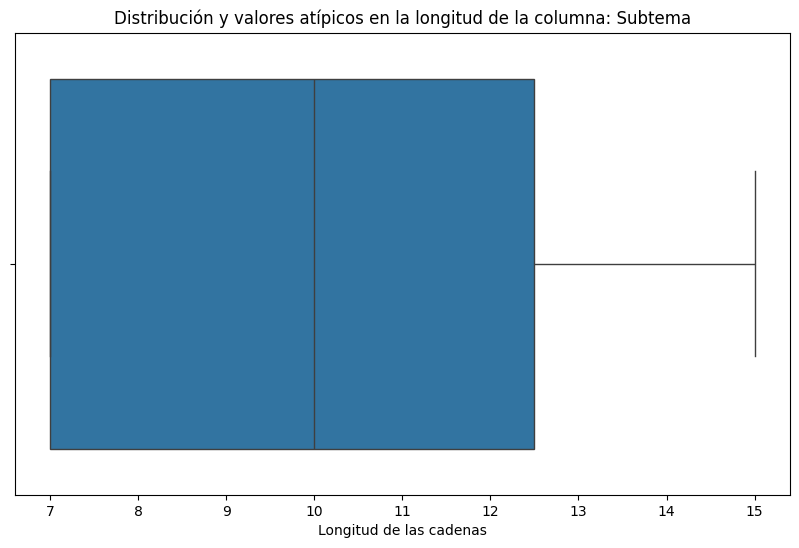


Valores atípicos detectados en la longitud de la columna 'Subtema':
Empty DataFrame
Columns: [Subtema]
Index: []


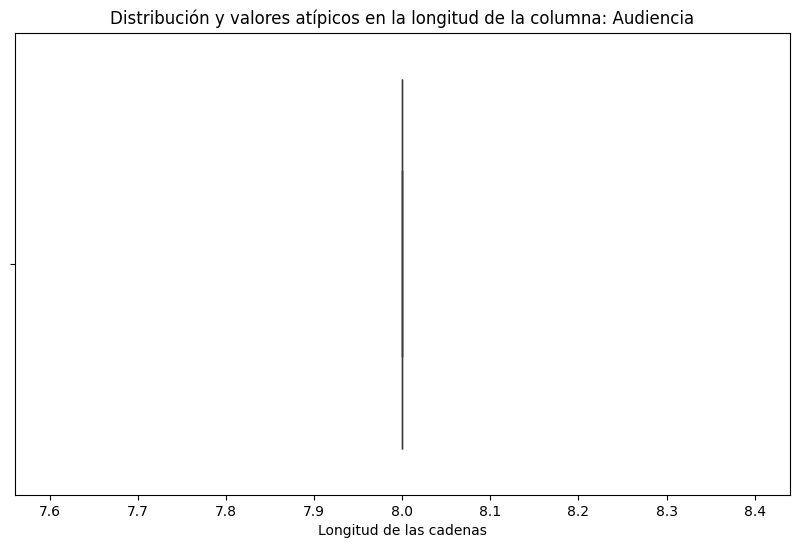


Valores atípicos detectados en la longitud de la columna 'Audiencia':
Empty DataFrame
Columns: [Audiencia]
Index: []


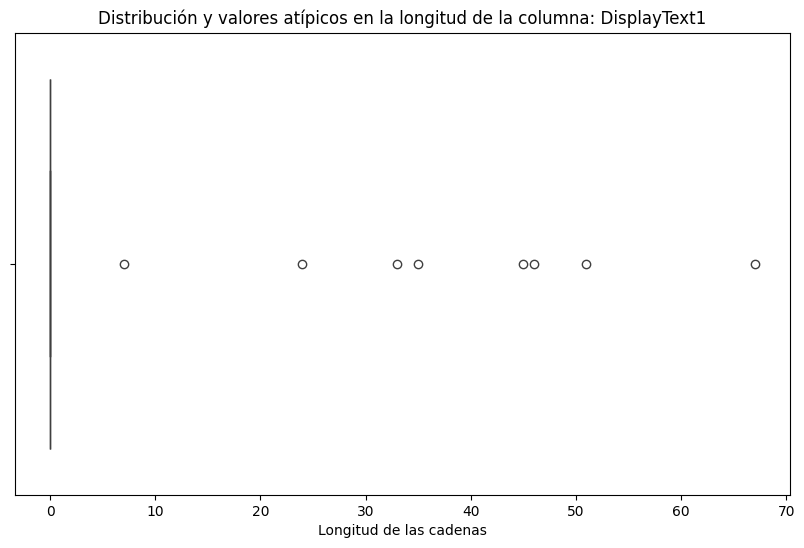


Valores atípicos detectados en la longitud de la columna 'DisplayText1':
                                        DisplayText1
4  ¿Cómo solicitar alimentos y bebidas para mi ev...
6     ¿Cómo puedo consultar los hoteles en convenio?
7  ¿Qué actividades deportivas puedo tomar en el ...


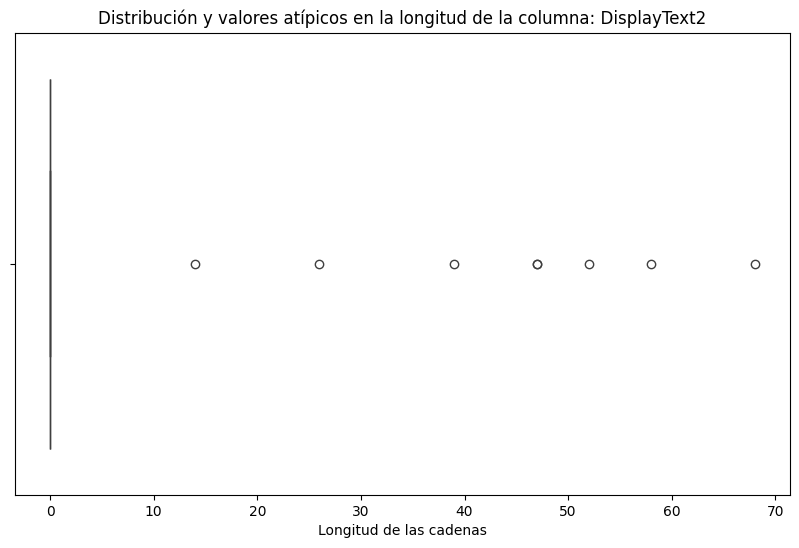


Valores atípicos detectados en la longitud de la columna 'DisplayText2':
                                        DisplayText2
3  ¿En qué casos aplica colocar el folio de refle...
6  ¿Cuál es la guía de devolución de sobrantes de...
7  ¿Quiénes pueden acceder a las actividades físi...


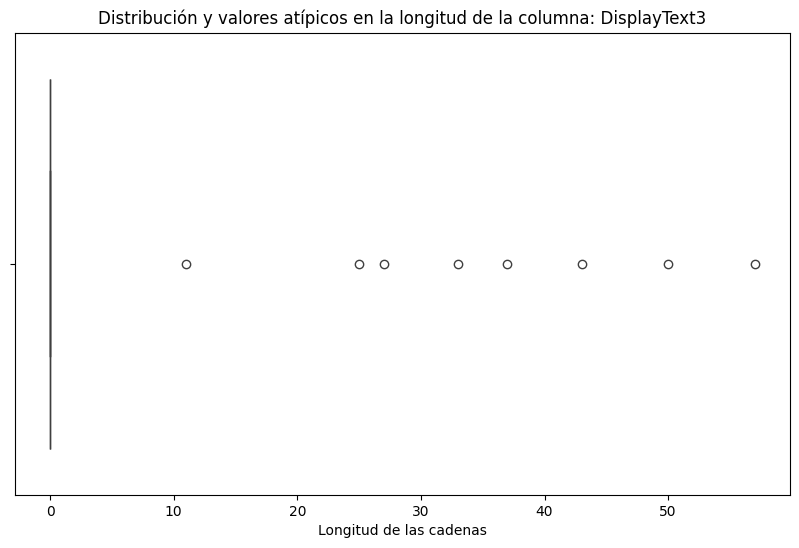


Valores atípicos detectados en la longitud de la columna 'DisplayText3':
                                        DisplayText3
2  ¿Qué tipos de peligros hay por correo electrón...
4        ¿Cómo encontrar proveedores para un evento?
5  ¿Cómo consigo la constancia de impuestos de mi...


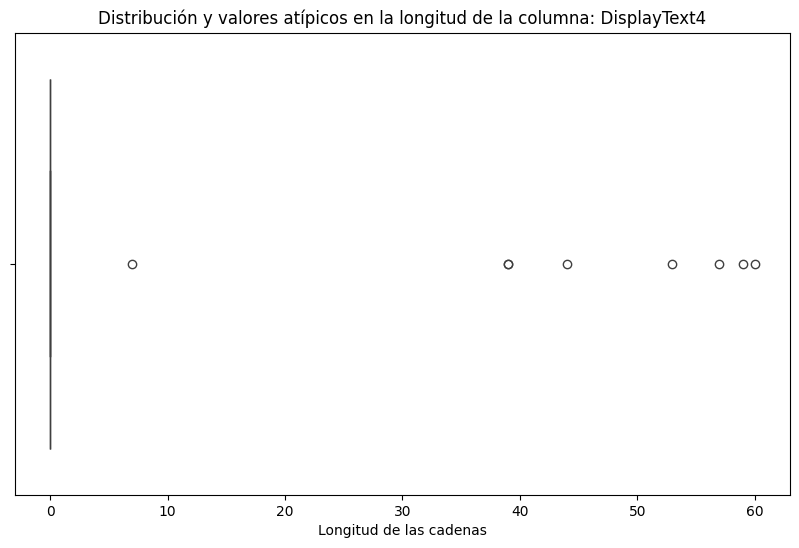


Valores atípicos detectados en la longitud de la columna 'DisplayText4':
                                        DisplayText4
1  ¿Cómo actualizar tu plan de Gympass a uno de m...
4  ¿Cuáles son los requisitos para que mi evento ...
7  ¿Cómo puedo solicitar ayuda a través de la lín...


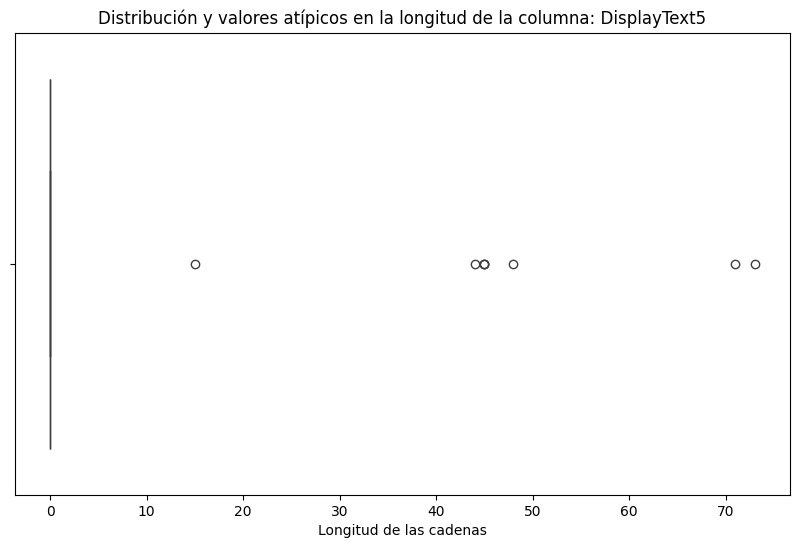


Valores atípicos detectados en la longitud de la columna 'DisplayText5':
                                        DisplayText5
3  ¿Dónde reporto que no me aparece mi orden de c...
4  ¿Qué guía me ayudará a implementar acciones so...
5   ¿Cómo consigo una constancia para trámtiar VISA?


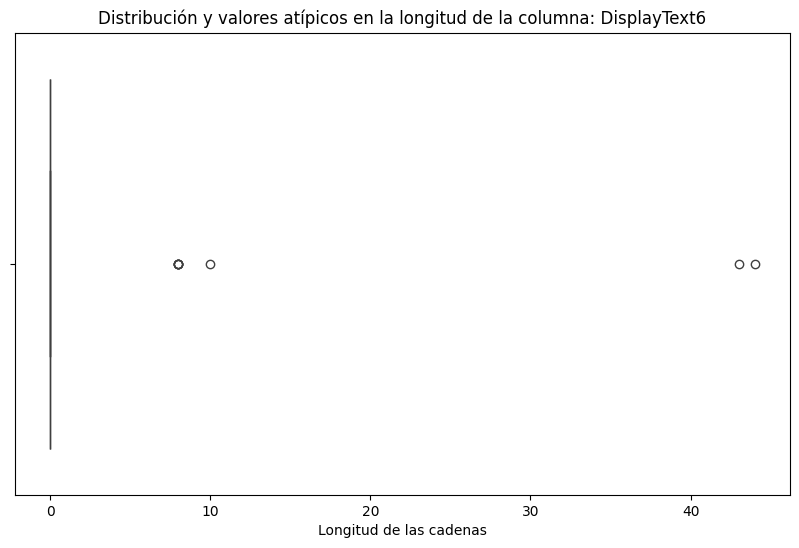


Valores atípicos detectados en la longitud de la columna 'DisplayText6':
                                   DisplayText6
0                                    mis Viajes
4   ¿Cómo puedo pedir una sala de conferencias?
6  ¿Cómo pido mi reembolso de gastos de viaje? 


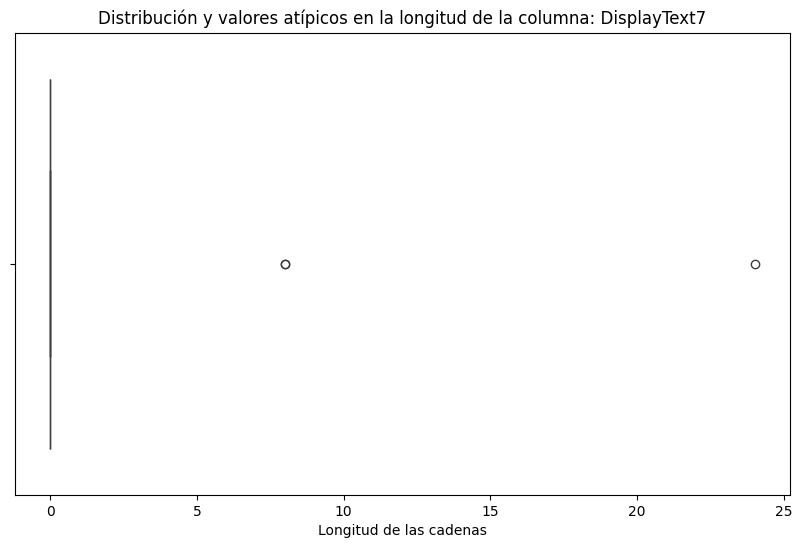


Valores atípicos detectados en la longitud de la columna 'DisplayText7':
               DisplayText7
0  Bienestar y Flexibilidad
4                  Regresar
6                  Regresar


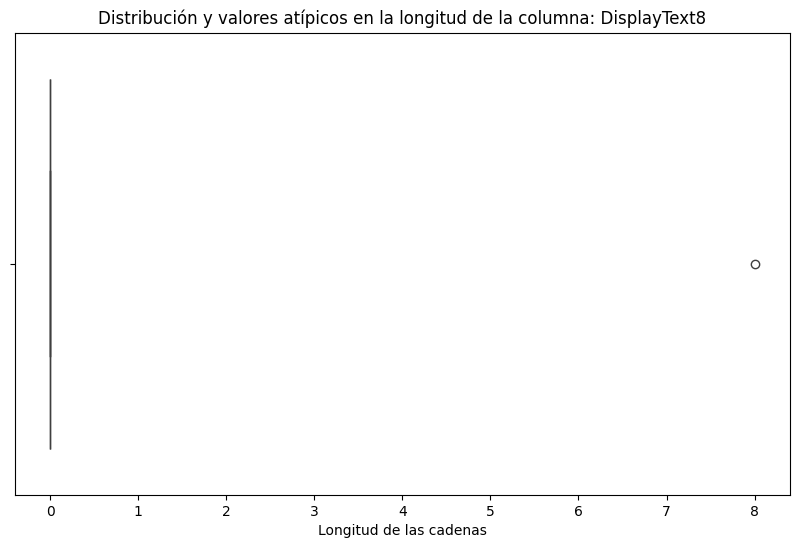


Valores atípicos detectados en la longitud de la columna 'DisplayText8':
  DisplayText8
0     Regresar


In [79]:
# Visualización de boxplots para detectar valores atípicos
string_columns = df.select_dtypes(include=['object']).columns

for col in string_columns:
    # Calcular la longitud de cada entrada en la columna
    df[f'{col}_length'] = df[col].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

    # Visualizar la distribución de las longitudes usando un boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[f'{col}_length'])
    plt.title(f'Distribución y valores atípicos en la longitud de la columna: {col}')
    plt.xlabel('Longitud de las cadenas')
    plt.show()

    # Mostrar información sobre los valores atípicos
    outliers = df[df[f'{col}_length'] > df[f'{col}_length'].quantile(0.95)]  # Ejemplo de outliers superiores al percentil 95
    print(f"\nValores atípicos detectados en la longitud de la columna '{col}':")
    print(outliers[[col]].head())


In [80]:
# 4. Analizar cardinalidad de variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nCardinalidad de la columna '{col}': {df[col].nunique()}")


Cardinalidad de la columna 'Question': 47

Cardinalidad de la columna 'Answer': 47

Cardinalidad de la columna 'Tema': 1

Cardinalidad de la columna 'Subtema': 11

Cardinalidad de la columna 'Audiencia': 1

Cardinalidad de la columna 'DisplayText1': 8

Cardinalidad de la columna 'DisplayText2': 8

Cardinalidad de la columna 'DisplayText3': 8

Cardinalidad de la columna 'DisplayText4': 8

Cardinalidad de la columna 'DisplayText5': 8

Cardinalidad de la columna 'DisplayText6': 4

Cardinalidad de la columna 'DisplayText7': 2

Cardinalidad de la columna 'DisplayText8': 1


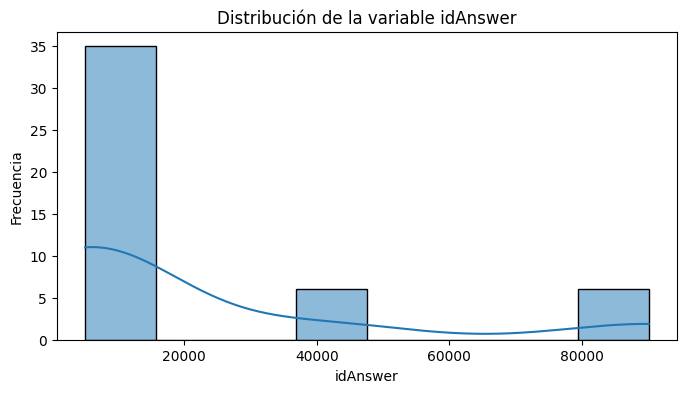

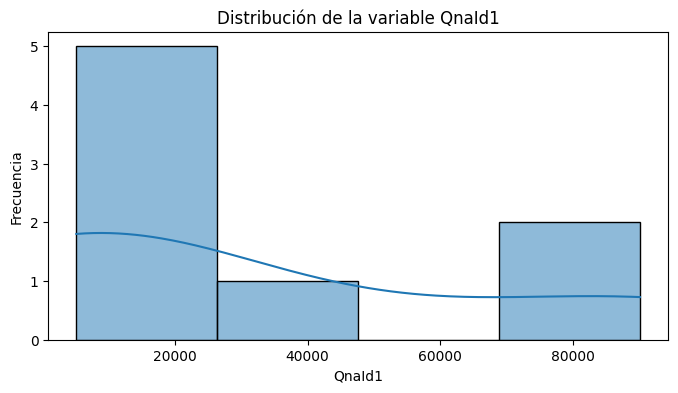

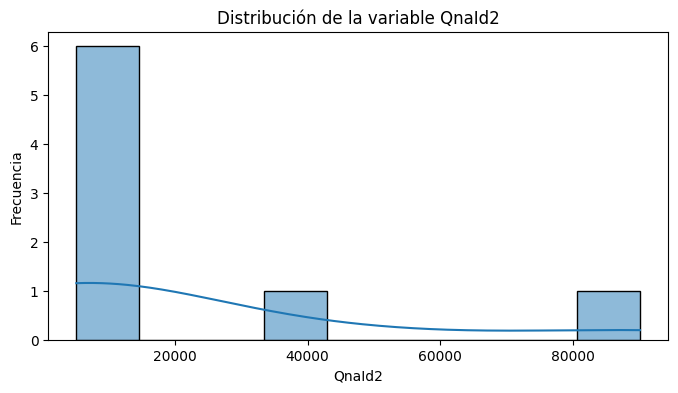

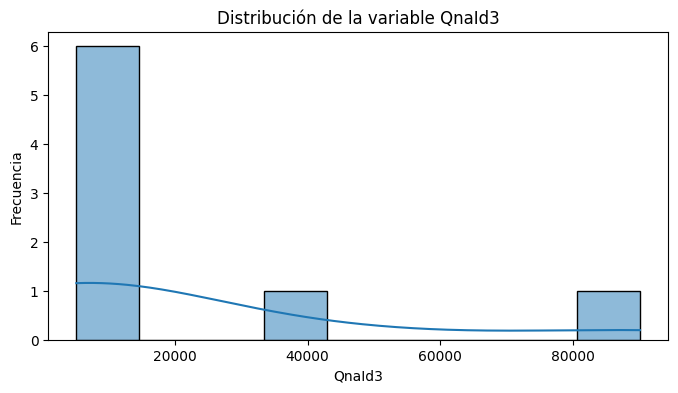

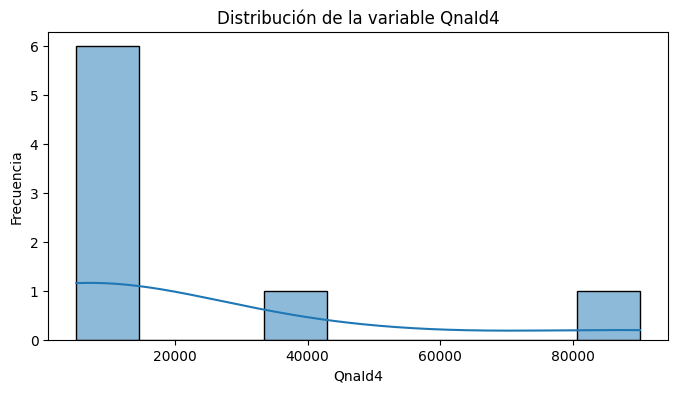

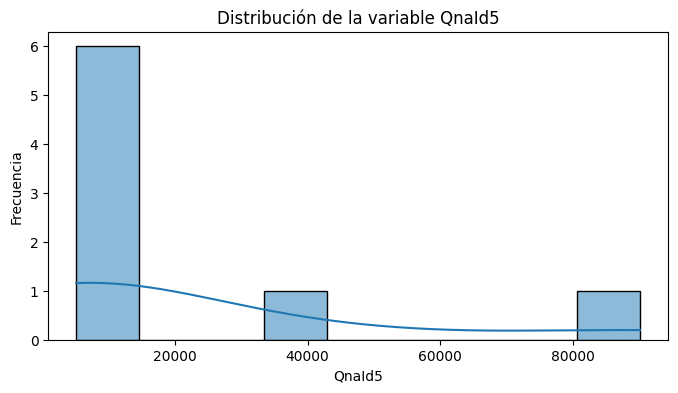

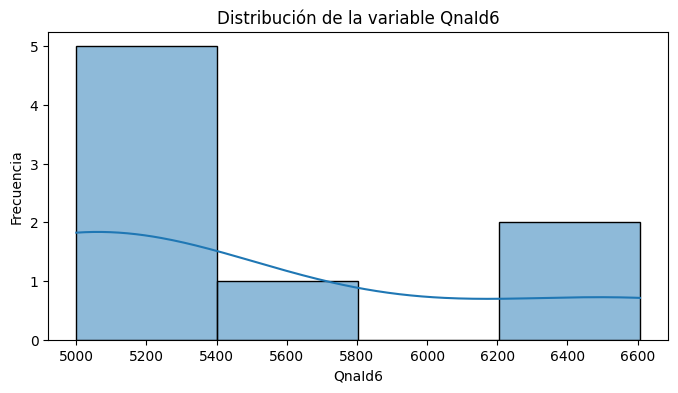

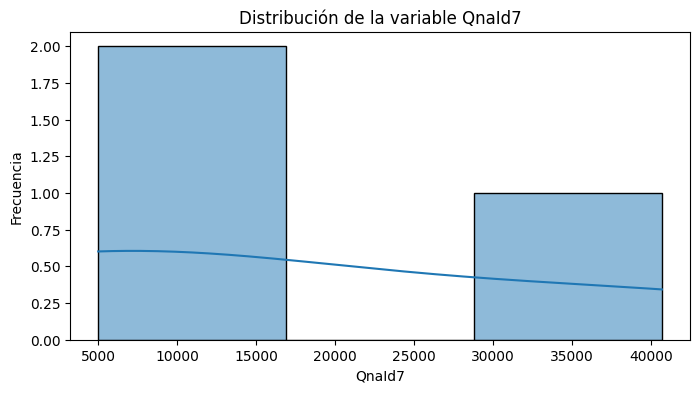

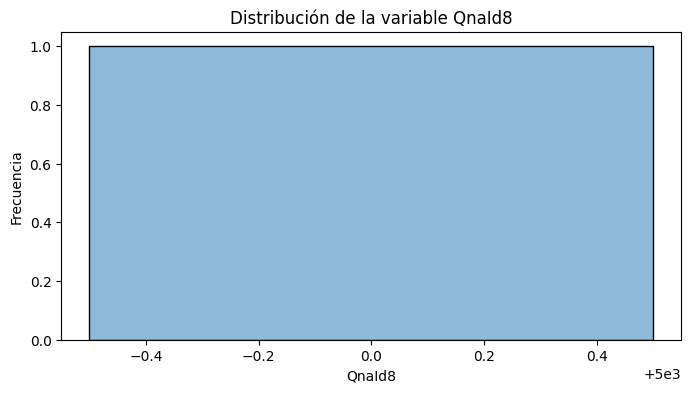

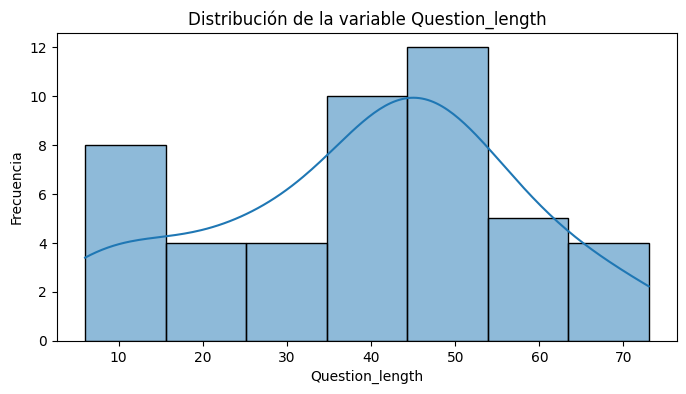

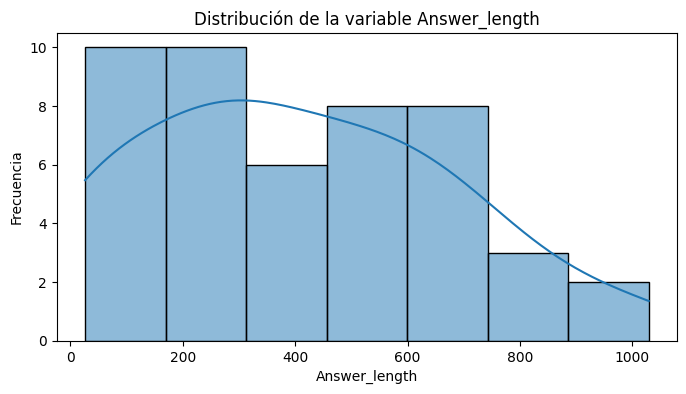

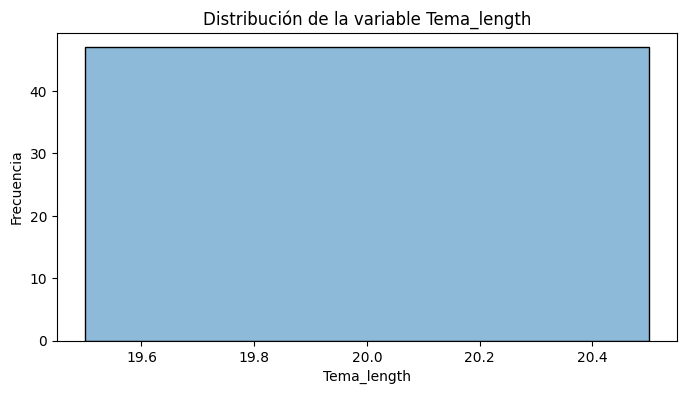

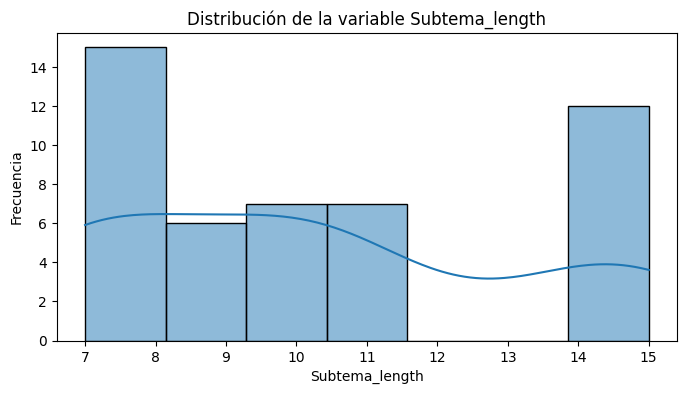

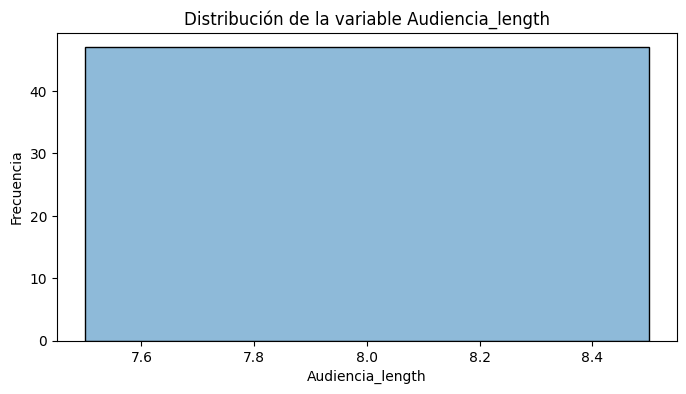

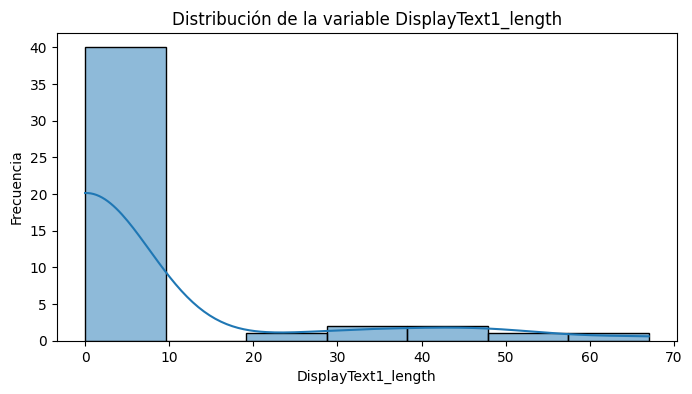

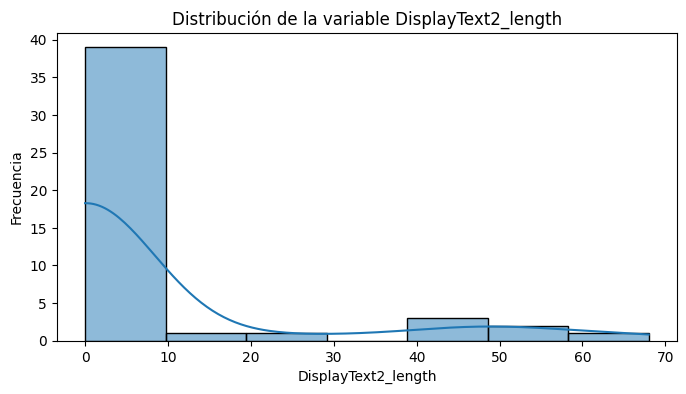

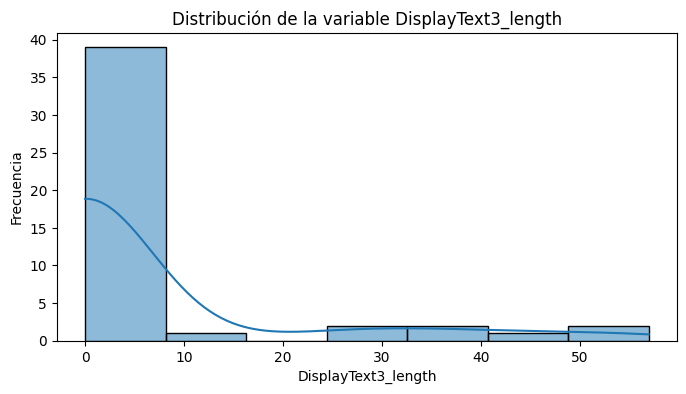

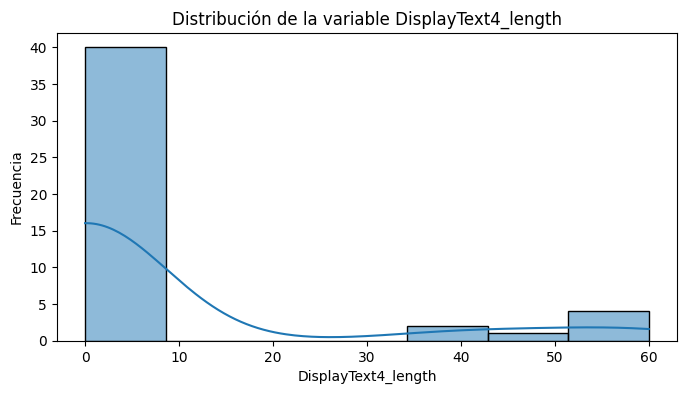

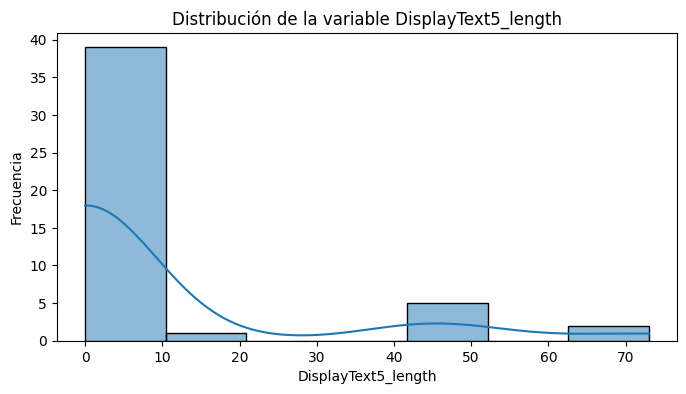

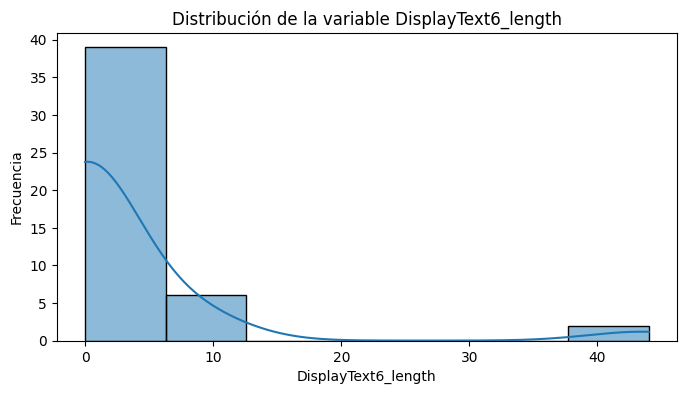

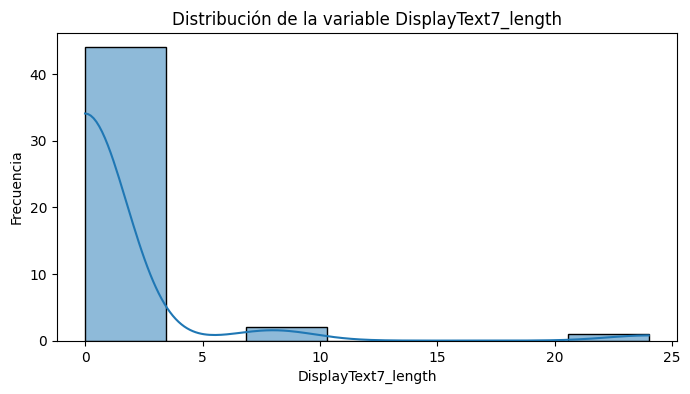

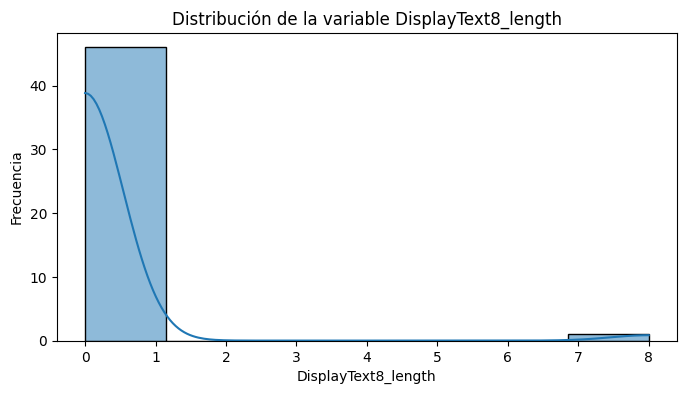

In [81]:
# 5. Distribuciones de las variables numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Seleccionar columnas numéricas actuales

if len(numeric_columns) > 0:
    for col in numeric_columns:
        if col in df.columns:  # Verificar si la columna existe antes de proceder
            plt.figure(figsize=(8, 4))
            sns.histplot(df[col].dropna(), kde=True)
            plt.title(f'Distribución de la variable {col}')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')
            plt.show()
else:
    print("No hay columnas numéricas en el DataFrame para analizar su distribución.")


In [82]:
# 6. Análisis de relación entre variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

if len(categorical_columns) > 1:  # Asegurarse de que haya al menos dos columnas categóricas
    for i in range(len(categorical_columns)):
        for j in range(i + 1, len(categorical_columns)):
            col1 = categorical_columns[i]
            col2 = categorical_columns[j]

            # Crear una tabla de contingencia
            contingency_table = pd.crosstab(df[col1], df[col2])
            print(f"\nTabla de contingencia entre '{col1}' y '{col2}':")
            print(contingency_table)

            # Visualizar la relación con un gráfico de calor
            plt.figure(figsize=(10, 8))
            sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
            plt.title(f'Relación entre {col1} y {col2}')
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()
else:
    print("No hay suficientes columnas categóricas para realizar el análisis de relación.")


Output hidden; open in https://colab.research.google.com to view.

In [83]:
# 7. Distribución en función de todas las columnas categóricas - Imprimir cada gráfico por separado
categorical_columns = df.select_dtypes(include=['object', 'category']).columns  # Seleccionar todas las columnas categóricas

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de la variable categórica: {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.show()

    print(f"\nDistribución de la columna categórica: '{col}'")
    print(df[col].value_counts())


Output hidden; open in https://colab.research.google.com to view.

In [84]:
# 8. Identificación de clusters (agrupaciones) - Imprimir cada gráfico de dispersión por separado
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Estandarizar los datos numéricos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_columns].fillna(0))

# Reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Crear un gráfico de dispersión para cada columna categórica relevante con respecto a las componentes principales
#categorical_columns = ['Tema', 'Subtema', 'Audiencia']  # Puedes ajustar estas columnas según tu caso
categorical_columns = df.select_dtypes(include=['object', 'category']).columns  # Seleccionar todas las columnas categóricas

for category in categorical_columns:
    plt.figure(figsize=(10, 6))

    if category in df.columns:
        sns.scatterplot(x='PCA1', y='PCA2', data=df, hue=category, palette='viridis', legend='full')
        plt.title(f'Clusters basados en PCA en función de la categoría: {category}')
        plt.xlabel('Componente Principal 1')
        plt.ylabel('Componente Principal 2')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

        print(f"\nGráfico de clusters para la categoría: '{category}'")
    else:
        print(f"La columna '{category}' no está presente en el DataFrame.")


Output hidden; open in https://colab.research.google.com to view.

In [85]:
# Conclusiones del EDA
print("\nConclusiones del Análisis Exploratorio de Datos:")
print(f"- El conjunto de datos tiene {df.shape[0]} filas y {df.shape[1]} columnas.")
print(f"- Hay {missing_values.sum()} valores faltantes en total. Las columnas con más valores faltantes son: {missing_values[missing_values > 0].index.tolist()}")
print("- Las columnas con alta cardinalidad son:", [col for col in categorical_columns if df[col].nunique() > 10])
print("- Se han detectado valores atípicos en las siguientes columnas:", outliers.columns.tolist())
print("- La variable 'Tema' muestra múltiples categorías, se recomienda realizar un análisis más detallado de estas.")



Conclusiones del Análisis Exploratorio de Datos:
- El conjunto de datos tiene 47 filas y 50 columnas.
- Hay 1682 valores faltantes en total. Las columnas con más valores faltantes son: ['idQuestion', 'Responsable', 'QnaId1', 'DisplayText1', 'QnaId2', 'DisplayText2', 'QnaId3', 'DisplayText3', 'QnaId4', 'DisplayText4', 'QnaId5', 'DisplayText5', 'QnaId6', 'DisplayText6', 'QnaId7', 'DisplayText7', 'QnaId8', 'DisplayText8', 'QnaId9', 'DisplayText9', 'QnaId10', 'DisplayText10', 'QnaId11', 'DisplayText11', 'QnaId12', 'DisplayText12', 'QnaId13', 'DisplayText13', 'QnaId14', 'DisplayText14', 'QnaId15', 'DisplayText15', 'QnaId16', 'DisplayText16', 'QnaId17', 'DisplayText17', 'QnaId18', 'DisplayText18']
- Las columnas con alta cardinalidad son: ['Question', 'Answer', 'Subtema']
- Se han detectado valores atípicos en las siguientes columnas: ['Question', 'idAnswer', 'Answer', 'Tema', 'Subtema', 'Audiencia', 'QnaId1', 'DisplayText1', 'QnaId2', 'DisplayText2', 'QnaId3', 'DisplayText3', 'QnaId4', 'Di

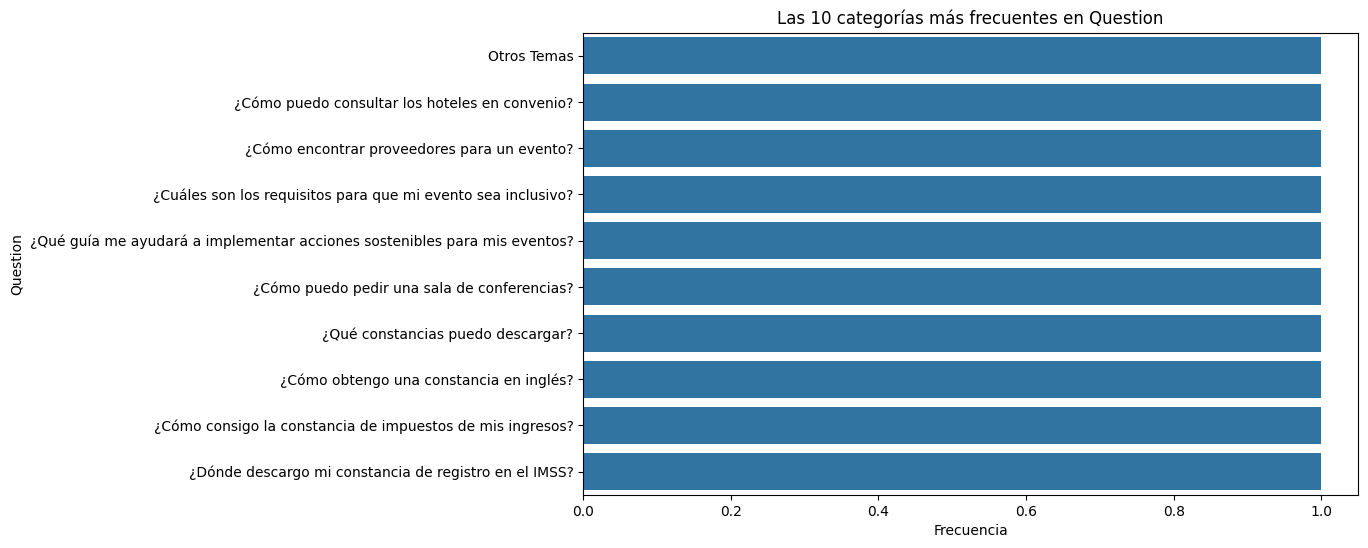

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127976 (\N{HOTEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129488 (\N{FACE WITH MONOCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128072 (\N{WHITE LEFT POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129303 (\N{HUGGING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127979 (\N{SCHOOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pyl

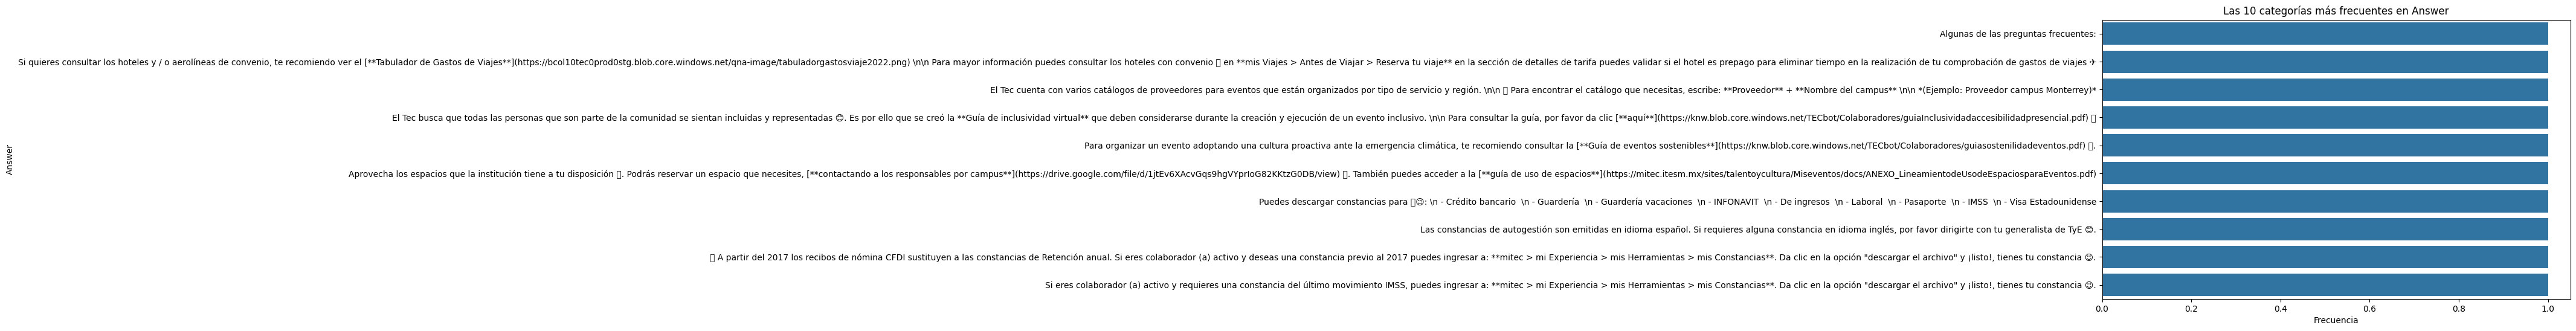

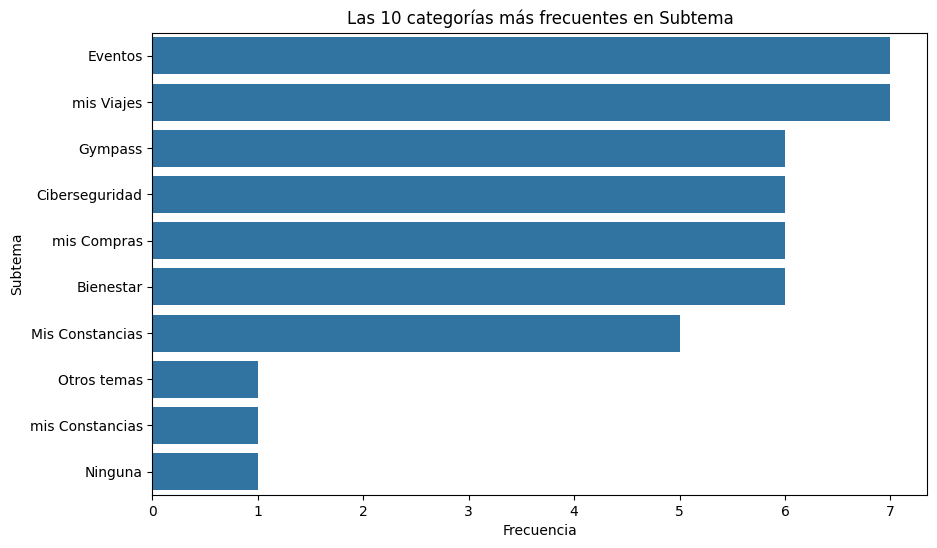

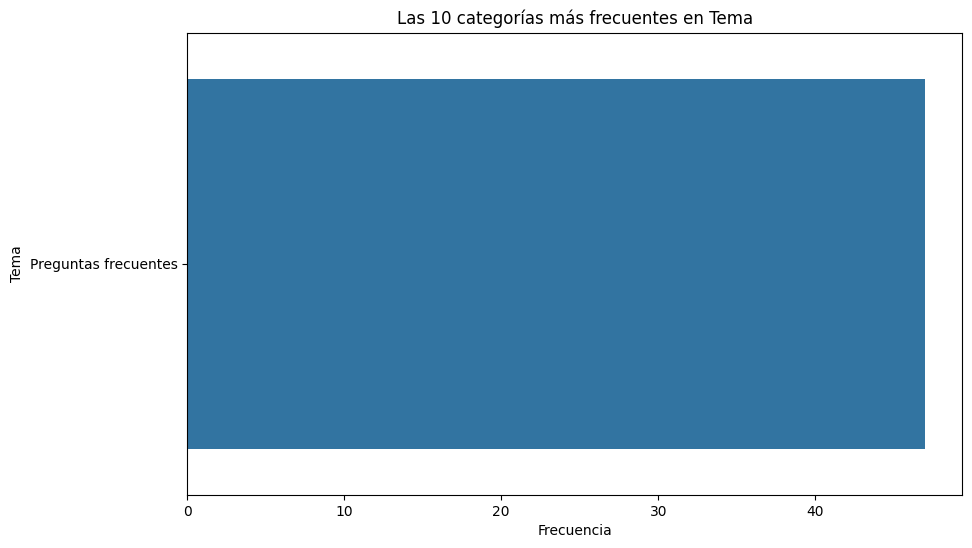

In [86]:
# Columnas de alta cardinalidad seleccionadas
high_cardinality_cols = ['Question', 'Answer', 'Subtema', 'Tema']

# Gráfico de barras para las columnas con alta cardinalidad
for col in high_cardinality_cols:
    plt.figure(figsize=(10, 6))
    # Mostrar las 10 categorías más frecuentes
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f'Las 10 categorías más frecuentes en {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.show()


In [70]:
df

,Question,idAnswer,Answer,Tema,Subtema,Audiencia,QnaId1,DisplayText1,QnaId2,DisplayText2,...,DisplayText1_length,DisplayText2_length,DisplayText3_length,DisplayText4_length,DisplayText5_length,DisplayText6_length,DisplayText7_length,DisplayText8_length,PCA1,PCA2
0,Otros Temas,5000,Algunas de las preguntas frecuentes:,Preguntas frecuentes,Otros temas,pregfreq,90150.0,Gympass,5100.0,Ciberseguridad,...,7,14,11,7,15,10,24,8,6.115700,12.705181
1,Gympass,90150,Preguntas frecuentes de **Gympass**,Preguntas frecuentes,Gympass,pregfreq,90151.0,¿Cómo puedo registrarme en Gympass?,90152.0,¿Cuáles son los costos y membresías de Gympass?,...,35,47,37,57,44,8,0,0,11.605953,-4.838227
2,Ciberseguridad,5100,Preguntas frecuentes de **Ciberseguridad**,Preguntas frecuentes,Ciberseguridad,pregfreq,5101.0,¿Cómo instalo el antivirus en mi computadora?,5102.0,¿Mi celular usa antivirus?,...,45,26,50,39,45,8,0,0,4.162603,-0.709641
3,Compras,5300,Preguntas frecuentes de **mis Compras**,Preguntas frecuentes,mis Compras,pregfreq,5301.0,Ayuda con una cotización,5302.0,¿En qué casos aplica colocar el folio de refle...,...,24,52,25,39,71,8,0,0,4.251429,-0.722538
4,Eventos,5600,Preguntas frecuentes de **Eventos**,Preguntas frecuentes,Eventos,pregfreq,5601.0,¿Cómo solicitar alimentos y bebidas para mi ev...,5602.0,¿Cómo obtener un espacio para evento en campus?,...,51,47,43,60,73,43,8,0,6.774096,0.302464
5,Mis Constancias,6000,Preguntas frecuentes de **mis Constancias**,Preguntas frecuentes,mis Constancias,pregfreq,6001.0,¿Qué constancias puedo descargar?,6002.0,¿Cómo obtengo una constancia en inglés?,...,33,39,57,53,48,8,0,0,4.627450,-0.848750
6,Viajes,6600,Preguntas frecuentes de **mis Viajes**,Preguntas frecuentes,mis Viajes,pregfreq,6601.0,¿Cómo puedo consultar los hoteles en convenio?,6602.0,¿Cuál es la guía de devolución de sobrantes de...,...,46,58,33,44,45,44,8,0,6.254365,0.588251
7,Bienestar y Flexibilidad,40684,Preguntas frecuentes de **Bienestar y Flexibil...,Preguntas frecuentes,Bienestar,pregfreq,40685.0,¿Qué actividades deportivas puedo tomar en el ...,40686.0,¿Quiénes pueden acceder a las actividades físi...,...,67,68,27,59,45,8,0,0,8.008615,-2.830193
8,Ninguna de las anteriores,10000,Siento mucho que por el momento no tengo la in...,Preguntas frecuentes,Ninguna,pregfreq,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,-0.842321,-0.008090
9,¿Cómo puedo registrarme en Gympass?,90151,Tienes dos opciones para **registrarte en Gymp...,Preguntas frecuentes,Gympass,pregfreq,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,-1.196131,-0.479352


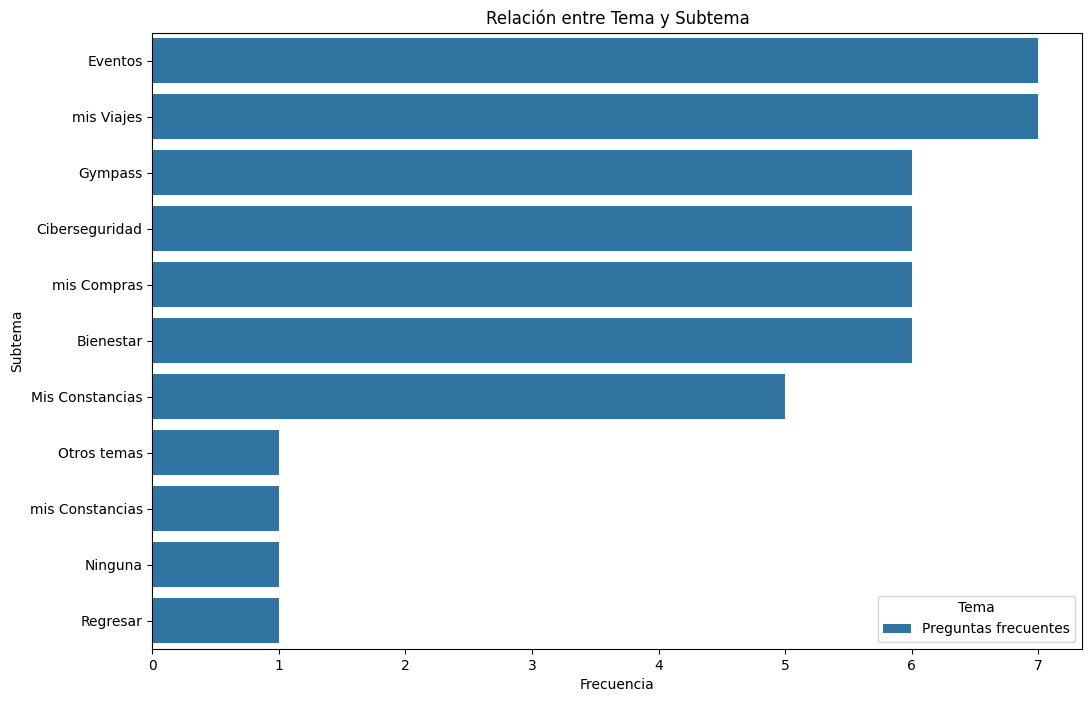

In [87]:
# Visualización de la relación entre Tema y Subtema
if 'Tema' in df.columns and 'Subtema' in df.columns:
    plt.figure(figsize=(12, 8))

    # Contar la frecuencia de Subtemas por Tema
    sns.countplot(y='Subtema', hue='Tema', data=df, order=df['Subtema'].value_counts().index)

    plt.title('Relación entre Tema y Subtema')
    plt.xlabel('Frecuencia')
    plt.ylabel('Subtema')
    plt.legend(title='Tema')
    plt.show()
